# Exercise 03

Analyze the baby names dataset using pandas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load dataset
names = pd.read_csv('baby-names2.csv')

In [3]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [4]:
names[names.year == 1993].head()    

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [5]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

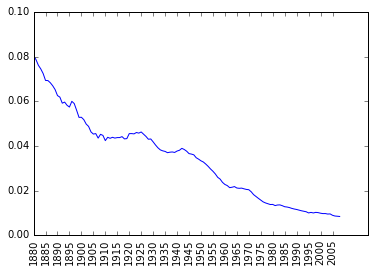

In [6]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

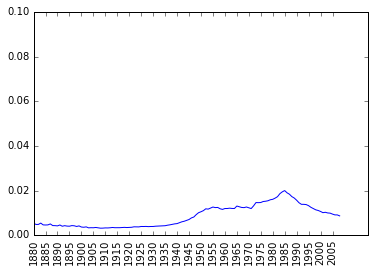

In [7]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 03.1

Which has been the most popular boy name every decade?

---
Cual ha sido el nombre de niño mas popular en cada decada

In [8]:
boys['decade'] = (np.floor(boys['year'].values / 10)*10).astype(np.int)

In [9]:
pivot = pd.pivot_table(boys, index='name', columns='decade', values='prop', aggfunc=np.sum)

In [10]:
pivot.idxmax(axis=0)

decade
1880       John
1890       John
1900       John
1910       John
1920     Robert
1930     Robert
1940      James
1950      James
1960    Michael
1970    Michael
1980    Michael
1990    Michael
2000      Jacob
dtype: object

# Exercise 03.2

Which has been the most popular girl name?

---
Cual ha sido el nombre de niña mas popular? 

In [11]:
pivot = pd.pivot_table(girls, index='name', columns='year', values='prop')
pivot.head()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
name,,,,,,,,,,,,,,,,,,,,,
Aaliyah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000559,0.000750,0.001694,0.002422,0.001831,0.001726,0.001703,0.001790,0.001870,0.001939
Aaron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abagail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000109,0.000111,0.000123,0.000130,0.000138,0.000128,0.000142,0.000143,0.000149,0.000153
Abbey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000365,0.000331,0.000347,0.000304,0.000312,0.000250,0.000223,0.000194,0.000165,0.000167
Abbie,0.000727,0.000819,0.000691,0.000658,0.000712,0.00062,0.000546,0.000669,0.000723,0.000565,...,0.000221,0.000217,0.000265,0.000261,0.000268,0.000248,0.000220,0.000211,0.000221,0.000193


In [12]:
pivot = pivot.fillna(0)
pivot.head()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
name,,,,,,,,,,,,,,,,,,,,,
Aaliyah,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000559,0.000750,0.001694,0.002422,0.001831,0.001726,0.001703,0.001790,0.001870,0.001939
Aaron,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abagail,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000109,0.000111,0.000123,0.000130,0.000138,0.000128,0.000142,0.000143,0.000149,0.000153
Abbey,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000365,0.000331,0.000347,0.000304,0.000312,0.000250,0.000223,0.000194,0.000165,0.000167
Abbie,0.000727,0.000819,0.000691,0.000658,0.000712,0.00062,0.000546,0.000669,0.000723,0.000565,...,0.000221,0.000217,0.000265,0.000261,0.000268,0.000248,0.000220,0.000211,0.000221,0.000193


In [13]:
pivot.mean(axis=1).idxmax()

'Mary'

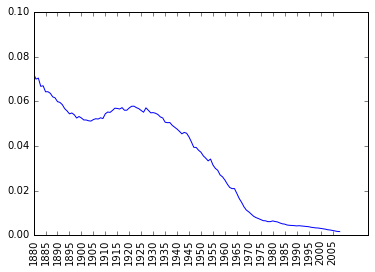

In [14]:
Mary = girls[girls['name']=='Mary']

plt.plot(range(Mary.shape[0]), Mary['prop'])
plt.xticks(range(Mary.shape[0])[::5], Mary['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 03.3

What is the most popular new girl name? (new is a name that appears only in the 2000's)

---
Cual es el nuevo nombre de niña mas popular? (Donde nuevo es un nombre que solo aparece en la ultima decada)

In [15]:
pivot_old_name = pivot.loc[:, 1880:1999].copy()
pivot_old_name.head()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
name,,,,,,,,,,,,,,,,,,,,,
Aaliyah,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000744,0.000653,0.000434,0.000911,0.000722,0.000559
Aaron,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abagail,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000109
Abbey,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000247,0.000222,0.000215,0.000255,0.000307,0.000286,0.000288,0.000338,0.000341,0.000365
Abbie,0.000727,0.000819,0.000691,0.000658,0.000712,0.00062,0.000546,0.000669,0.000723,0.000565,...,0.000152,0.000137,0.000130,0.000148,0.000180,0.000183,0.000182,0.000202,0.000206,0.000221


In [16]:
pivot_old_name['max'] = pivot_old_name.max(axis=1)

In [17]:
new_names = pivot_old_name[pivot_old_name['max'] == 0].index.values

In [18]:
new_names[0:10]

array(['Adalyn', 'Adalynn', 'Adamaris', 'Addisyn', 'Addyson', 'Adelyn',
       'Adison', 'Adyson', 'Ainsley', 'Akeelah'], dtype=object)

In [19]:
new_names_2000 = pivot.loc[new_names, 2000:].copy()
new_names_2000.head()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008
name,,,,,,,,,
Adalyn,0,0,0,0,0.000000,0.000000,0.000000,0.000150,0.000278
Adalynn,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000160
Adamaris,0,0,0,0,0.000000,0.000000,0.000137,0.000135,0.000000
Addisyn,0,0,0,0,0.000000,0.000000,0.000226,0.000232,0.000266
Addyson,0,0,0,0,0.000134,0.000175,0.000419,0.000655,0.000690


In [20]:
new_names_2000['sum'] = new_names_2000.sum(axis=1)

In [21]:
new_names_2000.sort_values('sum', ascending=False).head(10)

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,sum
name,,,,,,,,,,
Nevaeh,0.000000,0.000604,0.000860,0.001144,0.001575,0.002239,0.002833,0.003208,0.002914,0.015377
Keira,0.000113,0.000000,0.000121,0.000216,0.000617,0.000723,0.001449,0.001268,0.001318,0.005825
Reese,0.000125,0.000153,0.000311,0.000497,0.000616,0.000698,0.001048,0.001112,0.001078,0.005638
Cadence,0.000000,0.000000,0.000118,0.000309,0.000769,0.000824,0.000767,0.000809,0.000777,0.004373
Janiya,0.000111,0.000171,0.000220,0.000253,0.000419,0.000416,0.000402,0.000420,0.000441,0.002853
Ximena,0.000000,0.000133,0.000215,0.000281,0.000383,0.000438,0.000389,0.000418,0.000488,0.002745
Ainsley,0.000000,0.000292,0.000323,0.000342,0.000380,0.000342,0.000333,0.000334,0.000346,0.002692
Amya,0.000230,0.000215,0.000204,0.000353,0.000355,0.000350,0.000317,0.000318,0.000307,0.002649
Kaydence,0.000000,0.000000,0.000000,0.000117,0.000412,0.000431,0.000438,0.000483,0.000566,0.002447
